survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64
survived         2
pclass           3
sex              2
age             89
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    objec

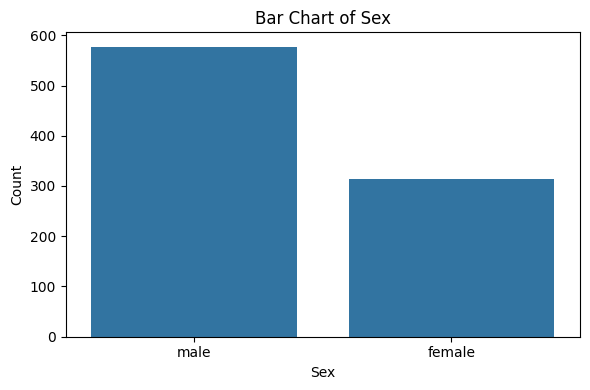

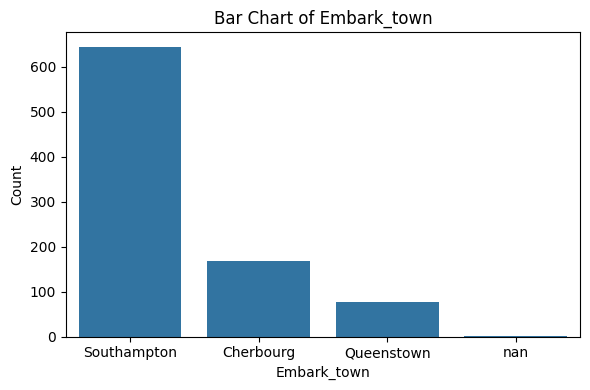

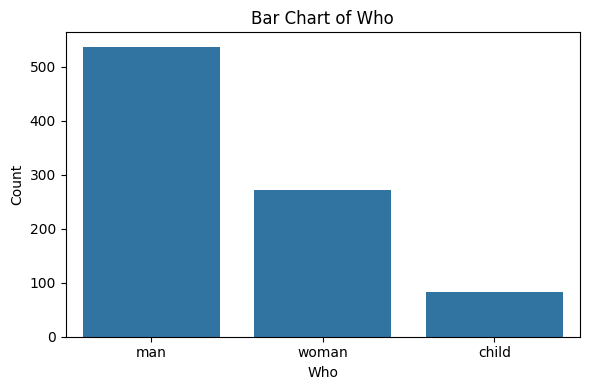

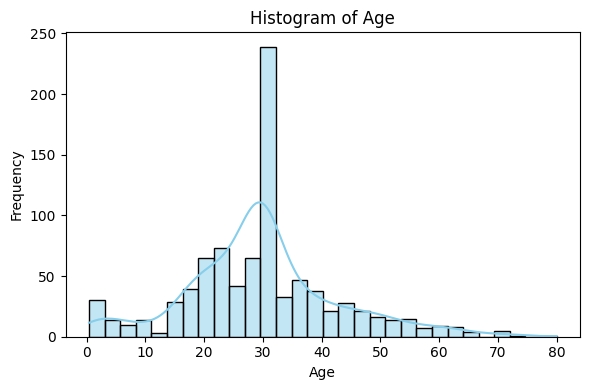

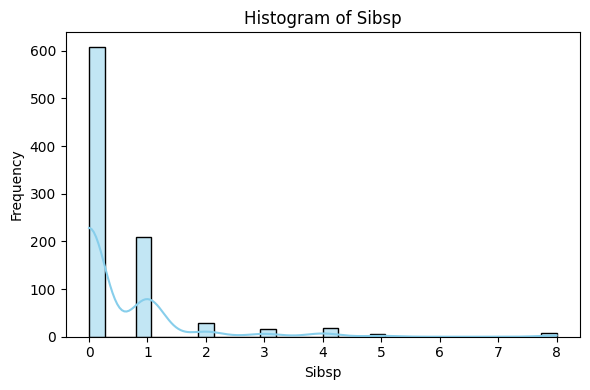

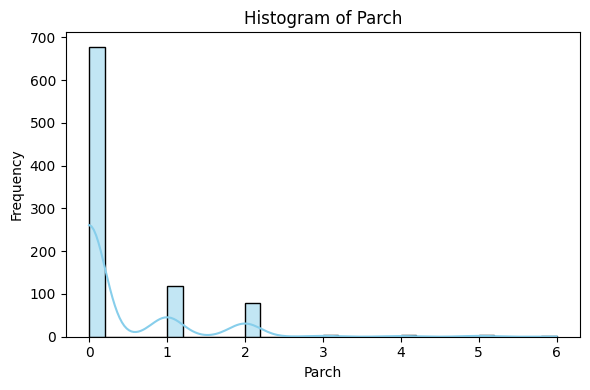

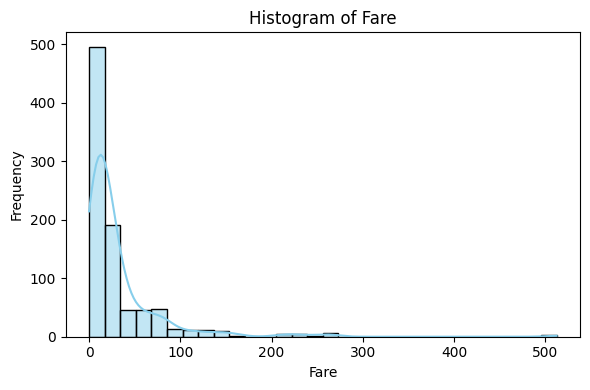

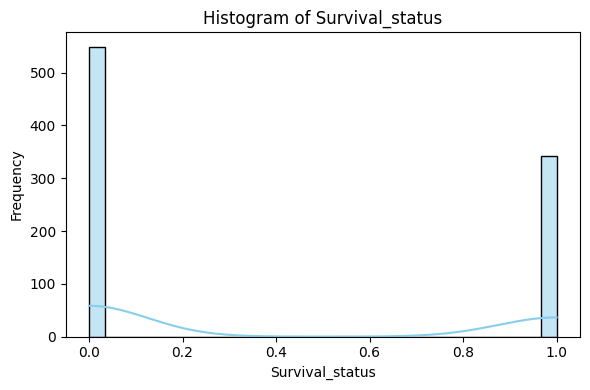

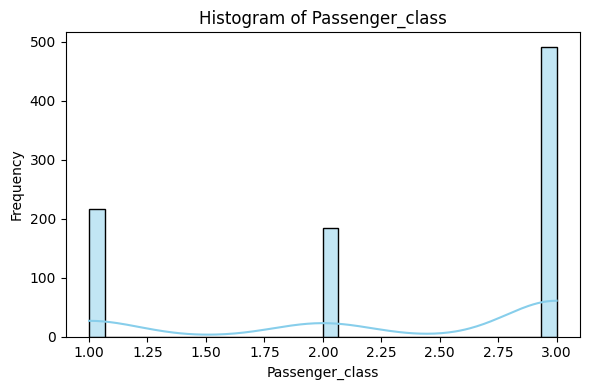

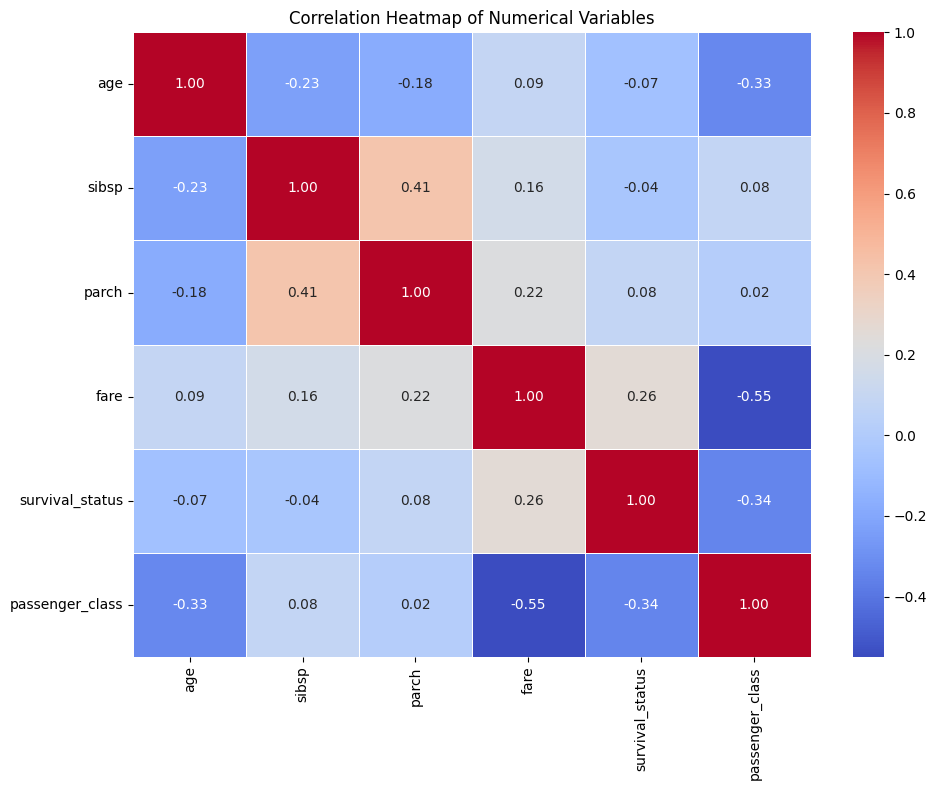

In [ ]:
#%%

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#importing dataset
data=pd.read_csv("titanic.csv")
data= pd.DataFrame(data)
#print(data)
#print(data.columns)

"""#checking basic information
data.shape #displays number of rows and columns
data.head() #to view first 5 rows of dataset
data.tail() #to view last 5 rows of dataset
data.info() #to check the data type and information in data
data.describe(include='all').T #gives descriptive statstics of each column"""

#managing missing values
data.isnull().sum() #gives the number of missing values in each column
print((data.isnull().sum()/(len(data)))*100) #helps to get the percentage of missing values in each column

#filling missing values in age column
data['age'].fillna(data['age'].mean(),inplace=True)
print(data.nunique())#gives unique values in each column

# Remove embarked and deck column from data
data = data.drop(['embarked','deck', 'adult_male'], axis = 1)
print(data.info())

#merging "alive and survived" "pclass and class"
def merge_and_delete_columns(df):
    # Merge 'alive' and 'survived' columns
    df['survival_status'] = df['alive'].map({'yes': 1, 'no': 0}).fillna(df['survived'])
    
    # Merge 'pclass' and 'class' columns
    df['passenger_class'] = df['pclass'].fillna(df['class'].map({'First': 1, 'Second': 2, 'Third': 3}))
    
    # Drop the original columns
    df.drop(columns=['alive', 'survived', 'pclass', 'class'], inplace=True)
    
    return df

# Apply the function to the dataset
data = merge_and_delete_columns(data)
print(data.head())
print(data.info())

#checking for missing values
data.nunique()#gives unique values in each column
data['embark_town'] = data['embark_town'].str.replace(' ', 'NaN').astype(str)

#print(data.info())

#checking for outliers
# We'll use IQR method to detect outliers in numerical features
numeric_df = data.select_dtypes(include=["int64", "float64"])

# Create a dictionary to store outlier counts
outlier_counts = {}

# Function to calculate outliers using IQR
for col in numeric_df:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]

outlier_counts

#EDA
#Bar Charts for Categorical Variables
categorical_column = 'sex'  
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x=categorical_column, order=data[categorical_column].value_counts().index)
plt.title(f'Bar Chart of {categorical_column.capitalize()}')
plt.xlabel(categorical_column.capitalize())
plt.ylabel('Count')
plt.tight_layout()
plt.show()

categorical_column = 'embark_town'
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x=categorical_column, order=data[categorical_column].value_counts().index)
plt.title(f'Bar Chart of {categorical_column.capitalize()}')
plt.xlabel(categorical_column.capitalize())
plt.ylabel('Count')
plt.tight_layout()
plt.show()

categorical_column = 'who'  
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x=categorical_column, order=data[categorical_column].value_counts().index)
plt.title(f'Bar Chart of {categorical_column.capitalize()}')
plt.xlabel(categorical_column.capitalize())
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#Histogram for Numerical Variables
numeric_column = 'age'  
plt.figure(figsize=(6, 4))
sns.histplot(data[numeric_column], kde=True, bins=30, color='skyblue')
plt.title(f'Histogram of {numeric_column.capitalize()}')
plt.xlabel(numeric_column.capitalize())
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

numeric_column = 'sibsp' 
plt.figure(figsize=(6, 4))
sns.histplot(data[numeric_column], kde=True, bins=30, color='skyblue')
plt.title(f'Histogram of {numeric_column.capitalize()}')
plt.xlabel(numeric_column.capitalize())
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

numeric_column = 'parch'
plt.figure(figsize=(6, 4))
sns.histplot(data[numeric_column], kde=True, bins=30, color='skyblue')
plt.title(f'Histogram of {numeric_column.capitalize()}')
plt.xlabel(numeric_column.capitalize())
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

numeric_column = 'fare'
plt.figure(figsize=(6, 4))
sns.histplot(data[numeric_column], kde=True, bins=30, color='skyblue')
plt.title(f'Histogram of {numeric_column.capitalize()}')
plt.xlabel(numeric_column.capitalize())
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

numeric_column = 'survival_status'
plt.figure(figsize=(6, 4))
sns.histplot(data[numeric_column], kde=True, bins=30, color='skyblue')
plt.title(f'Histogram of {numeric_column.capitalize()}')
plt.xlabel(numeric_column.capitalize())
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

numeric_column = 'passenger_class'
plt.figure(figsize=(6, 4))
sns.histplot(data[numeric_column], kde=True, bins=30, color='skyblue')
plt.title(f'Histogram of {numeric_column.capitalize()}')
plt.xlabel(numeric_column.capitalize())
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#Correlation Heatmap for Numerical Variables
# Select only numeric columns
numeric_data = data.select_dtypes(include=["int64", "float64"])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()